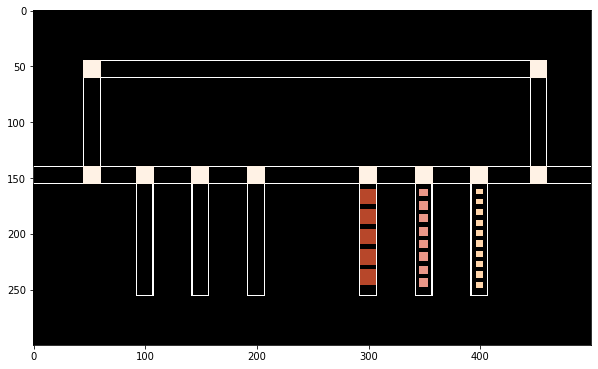

In [2]:
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

#colors used
large_c = '#b7472a'
medium_c= '#eb9788'
small_c = '#ffd5ab'
conveyor = '#fff2e5' 


def render_env():
    """Render in the background of the conveyer"""
    #create the background
    height = 300
    width = 500
    img_array = np.zeros((height, width, 3))

    #transform to PIL object
    im = Image.fromarray(img_array, mode="RGB")

    #draw the system
    draw = ImageDraw.Draw(im)

    # height A
    width_conv  =(0.05)*height
    topleft_c = (.45/5)*width
    top_right = (4.45/5)*width
    down_right = (1.55/3)*height
    length_input = (2.55/3)*height
    large_b = width_conv-2
    small_b = large_b/3
    medium_b = large_b/2

    tote_dist = (0.05/3)* height

    #Conveyor
    draw.rectangle((topleft_c,topleft_c,top_right+width_conv,topleft_c+width_conv)) #A
    draw.rectangle((top_right,topleft_c,top_right+width_conv,down_right)) #B
    draw.rectangle((topleft_c,down_right-width_conv,top_right+width_conv,down_right)) #C, D, F, G, H
    draw.rectangle((topleft_c,topleft_c,topleft_c+width_conv,down_right)) #I

    #out of system
    draw.rectangle((0, down_right-width_conv, topleft_c+width_conv, down_right)) #n10
    draw.rectangle((top_right, down_right-width_conv, width, down_right)) #n10

    #conveyors to GTP
    draw.rectangle(((2/5)*width-0.5*width_conv, down_right-width_conv, (2/5)*width+0.5*width_conv, length_input))
    draw.rectangle(((1.5/5)*width-0.5*width_conv, down_right-width_conv, (1.5/5)*width+0.5*width_conv, length_input))
    draw.rectangle(((1/5)*width-0.5*width_conv, down_right-width_conv, (1/5)*width+0.5*width_conv, length_input))

    #convey from carton storage
    draw.rectangle(((4/5)*width-0.5*width_conv, down_right-width_conv, (4/5)*width+0.5*width_conv, length_input)) #n4
    draw.rectangle(((3.5/5)*width-0.5*width_conv, down_right-width_conv, (3.5/5)*width+0.5*width_conv, length_input)) #n5
    draw.rectangle(((3/5)*width-0.5*width_conv, down_right-width_conv, (3/5)*width+0.5*width_conv, length_input)) #n6

    #transition points
    draw.rectangle((topleft_c, topleft_c, topleft_c+width_conv, topleft_c+width_conv), fill=conveyor) #n1
    draw.rectangle((top_right, topleft_c, top_right+width_conv, topleft_c+width_conv), fill=conveyor) #n2
    draw.rectangle((top_right, down_right-width_conv, top_right+width_conv, down_right), fill=conveyor) #n3
    draw.rectangle((topleft_c, down_right-width_conv, topleft_c+width_conv, down_right), fill=conveyor) #n10

    for x in [(1/5)*width, (1.5/5)*width, (2/5)*width,(3/5)*width, (3.5/5)*width, (4/5)*width]:
        draw.rectangle((x-0.5*width_conv, down_right-width_conv, x+0.5*width_conv, down_right), fill=conveyor) #n4

    ## in storage totes
    # small
    small_totes = 10
    for i in range(small_totes):
        draw.rectangle(((4/5)*width-0.5*small_b, down_right+tote_dist+i*(tote_dist+small_b), (4/5)*width+0.5*small_b, down_right+tote_dist+small_b+i*(tote_dist+small_b)), fill=small_c)

    #medium
    medium_totes = 8
    for i in range(medium_totes):
        draw.rectangle(((3.5/5)*width-0.5*medium_b, down_right+tote_dist+i*(tote_dist+medium_b), (3.5/5)*width+0.5*medium_b, down_right+tote_dist+medium_b+i*(tote_dist+medium_b)), fill=medium_c)

    #large
    large_totes = 5
    for i in range(large_totes):
        draw.rectangle(((3/5)*width-0.5*large_b, down_right+tote_dist+i*(tote_dist+large_b), (3/5)*width+0.5*large_b, down_right+tote_dist+large_b+i*(tote_dist+large_b)), fill=large_c)
    
    return im

im = render_env()

cv2.imshow("", np.array(im))

fig = plt.figure(figsize=(10,10))
plt.imshow(im)
plt.show()

In [3]:
steps = 1000
start_location = (400, 150)
current_x = start_location[0]
current_y = start_location[1]


for step in range(steps):
    im = render_env()
    draw = ImageDraw.Draw(im)
    
    #define action space
    if current_y == 150 and current_x >50:
        current_x = current_x -1 
    elif current_x ==50 and current_y > 50:
        current_y = current_y - 1
    elif current_y == 50 and current_x<450:
        current_y = current_y + 1
    else:
        pass
    
    #draw the new location:
    current_coordinates = (current_x - (1/2)*small_b, current_y - (1/2)*small_b, current_x+ (1/2)*small_b, current_y + (1/2) * small_b)
    cv2.imshow("", np.array(im))
    cv2.waitKey(1000)
    


NameError: name 'small_b' is not defined

In [39]:
start_location = (50, 150)
current_x = start_location[0]
current_y = start_location[1]


current_coordinates = (current_x - (1/2)*small_b, current_y - (1/2)*small_b, current_x+ (1/2)*small_b, current_y + (1/2) * small_b)

#if current_y == 150 and 

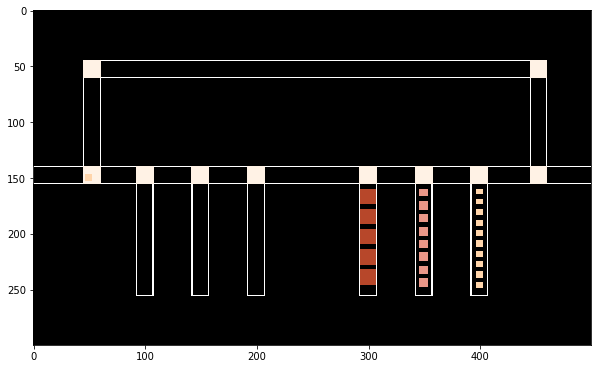

In [40]:
im = render_env()
draw = ImageDraw.Draw(im)
draw.rectangle(current_coordinates, fill=small_c)
fig = plt.figure(figsize=(10,10))
plt.imshow(im)
plt.show()

# First try on own env
to get familiar with the code

In [201]:
from random import *
class xywalking():
    def __init__(self):
        self.location = (100,100)
        #print("start location = (0,0)")
        
    def step(self):
        x = self.location[0] + randint(-10,10)  *10
        y = self.location[1] + randint(-10,10) *10
        self.location = (x,y)
                    
    def reset(self):
        self.location = (100,100)
    
    def render(self):
        #define shape
        height = 200
        width = 200
        img_array = np.zeros((height, width, 3))

        #transform to PIL object
        im = Image.fromarray(img_array, mode="RGB")

        #draw the system
        draw = ImageDraw.Draw(im)

        #draw rectangle
        x,y = self.location
        draw.rectangle([x-5,y-5,x+5,y+5], fill='#b7472a')

        cv2.imshow("Simulation-v0.1", np.array(im))
        cv2.waitKey(10)

# Start work on the conveyor
## multiple versions
Build in PyCharm, tested here for easy debugging

# V0.1
able to initialize variables, do actions, render with matplotlib

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class simple_conveyor():

    def __init__(self):
        #initialize divert points: 0=no diversion, 1=diversion
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = False #output of box size S 
        self.O2 = False #output of box size M
        self.O3 = False #output of box size L

        # initialize transition points: 0=no transition, 1=transition
        ## CURRENTLY NOT USED ##
        # self.T1 = 0
        # self.T2 = 0
        # self.T3 = 0

        # #initialize merge points
        # self.M1 = 0
        # self.M2 = 0
        # self.M3 = 0

        self.items_on_conv = []
        self.queue1 = []
        self.queue2 = []
        self.queue3 = []

        #intialize variables for later usage
        self.O1_location = False
        self.O2_location = False
        self.O3_location = False
        
    def init_queues(self, queues_list):
        self.queue1 = queues_list[0]
        self.queue2 = queues_list[1]
        self.queue3 = queues_list[2]
        
    def update_queues(self, quenr, variable):
        'For a given queue 1-3, add a variable (1,2,3)'
        if quenr == 1:
            self.queue1.append(variable)
        if quenr == 2:
            self.queue2.append(variable)
        if quenr == 3:
            self.queue3.append(variable)
            
    def remove_from_queue(self):
        'removes the oldest instance from queue'
        self.queue1 = self.queue1[1:]
        self.queue2 = self.queue2[1:]
        self.queue3 = self.queue3[1:]
            
    def reset(self):
        "reset all the variables to zero"
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = False #output of box size S 
        self.O2 = False #output of box size M
        self.O3 = False #output of box size L
        
        #empty amount of items on conv.
        self.items_on_conv = []

        #reset this var
        self.O1_location = False
        self.O2_location = False
        self.O2_location = False

    def set_step(self):
        #do some step
        for item in self.items_on_conv:
                #check diverters; is any of them True and is there an order carrier? move into lane.
                if item[0] == [12,7] and self.D1 == True:
                    item[0][1] +=1
                elif item[0] == [8,7] and self.D2 == True:
                    item[0][1] +=1
                elif item[0] == [4,7] and self.D3 == True:
                    item[0][1] +=1
                
                #otherwise; all items set a step in their moving direction 
                elif item[0][1] == 7 and item[0][0] > 2: #if on the lower line, and not reached left corner:
                    item[0][0] -=1                     #move left
                elif item[0][0] ==2 and item[0][1] >2: #if on left lane, and not reached top left corner:
                    item[0][1] -=1                     #move up
                elif item[0][1] == 2 and item[0][0] <28: #if on the top lane, and not reached right top corner:
                    item[0][0] +=1                      #Move right
                elif item[0][0] == 28 and item[0][1] <7: #if on right lane, and not reached right down corner:
                    item[0][1] +=1
                elif item[0][1] > 7 and item[0][1] < 12:
                    item[0][1] +=1

        #update occupation-states of mergepoints
        if [19,7] in [self.items_on_conv[item][0] for item in range(len(self.items_on_conv))]:
            self.O1_location == True
        if [22,7] in [self.items_on_conv[item][0] for item in range(len(self.items_on_conv))]:
            self.O2_location == True
        if [25,7] in [self.items_on_conv[item][0] for item in range(len(self.items_on_conv))]:
            self.O3_location == True

    def perform_actions_in_space(self):
        #check if any diverters need to be toggled
        
        
        #set step:
        self.set_step()
        
        ###output new order carrier(s)
        #if satisfied; output carrier type1
        if self.O1 == True and self.O1_location == False:
            self.O1_location ==True            #occupy the output
            self.items_on_conv.append([[19,7], 1])
            self.O1 = False                   #turn output off
        
        #if statisfied; output carrier type2
        elif self.O2 == True and self.O2_location == False:
            self.O2_location ==True            #occupy the output
            self.items_on_conv.append([[22,7], 2])
            self.O2 = False                   #turn output off
            
        #if satisfied, output carrier type3
        elif self.O3 == True and self.O3_location == False:
            self.O3_location ==True            #occupy the output
            self.items_on_conv.append([[25,7], 3])
            self.O3 = False                   #turn output off

    def step(self, action):
        if   action==0: self.perform_actions_in_space() #set a step for all items
        elif action==1: self.D1 = not self.D1 #toggle D1
        elif action==2: self.D2 = not self.D2 #Toggle D2
        elif action==3: self.D3 = not self.D3 #Toggle D3
        elif action==4: self.O1 = not self.O1 #toggle O1
        elif action==5: self.O2 = not self.O2 #toggle O2
        elif action==6: self.O3 = not self.O3 #toggle O3
        
        #todo:
        # - Fix returns
        # - build reward function
        # - termination criteria
        # - additional info

    def render(self):
        print('items on conveyor:')
        print(self.items_on_conv)
        print('states of Divert points:')
        print('D1 = {}, D2 = {}, D3 = {}'.format(self.D1, self.D2, self.D3))
        print('States of output points:')
        print('O1 = {}, O2 = {}, O3 = {}'.format(self.O1, self.O2, self.O3))
        print('Queue GTP 1: {}'.format(self.queue1))
        print('Queue GTP 2: {}'.format(self.queue2))
        print('Queue GTP 3: {}'.format(self.queue3))
        
        df = pd.read_csv('representation3.csv', delimiter=';', ).fillna(0)
        listoflists = df.values.tolist()
        image = np.asarray([[(255,255,255) if x =='x' else (220,220,220) if x =='y' else (0,0,0) for x in item] for item in listoflists])

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 
        plt.imshow(np.asarray(image))
        plt.show()
        
        
        #define shape
        # height = 200
        # width = 200
        # img_array = np.zeros((height, width, 3))

        # #transform to PIL object
        # im = Image.fromarray(img_array, mode="RGB")

        # #draw the system
        # draw = ImageDraw.Draw(im)

        # #draw rectangle
        # x,y = self.location
        # draw.rectangle([x-5,y-5,x+5,y+5], fill='#b7472a')

        # cv2.imshow("Simulation-v0.1", np.array(im))
        # cv2.waitKey(10)

In [24]:
queues = [[1,2,3,2,3,1], [2,3,1,3,1,2], [1,3,2,1,2,2]] #sample queues for format WHERE 1=S, 2=M, 3=L
env = simple_conveyor()

In [25]:
env.reset()

items on conveyor:
[[[7, 7], 1], [[12, 8], 2], [[16, 7], 1]]
states of Divert points:
D1 = True, D2 = False, D3 = False
States of output points:
O1 = False, O2 = False, O3 = False
Queue GTP 1: []
Queue GTP 2: []
Queue GTP 3: []


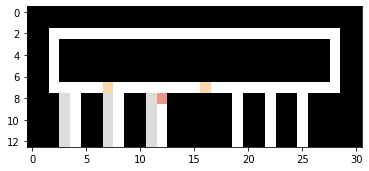

In [39]:
#action 0: #set a step for all items
#action 1: #toggle D1
#action 2: #Toggle D2
#action 3: #Toggle D3
#action 4: #toggle O1
#action 5: #toggle O2
#action 6: #toggle O3
#env.step(1)
env.step(0)
#env.init_queues(queues)      #initialize new queues with a nested list
#env.update_queues(1,2)       #add a item to que 1 of size 2
#env.remove_from_queue()      #removes the oldest item in the list from queue
env.render()                 #renders the thing on screen

# V0.2
able to make decisions on diverts based on the queues given, therefore able to satisfy demand of the GTP queues

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

class simple_conveyor():

    def __init__(self, queues):
        """initialize states of the variables, the lists used"""
        #init queues
        self.queues = queues
        self.init_queues(self.queues)
        
        #initialize divert points: 0=no diversion, 1=diversion
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = False #output of box size S 
        self.O2 = False #output of box size M
        self.O3 = False #output of box size L

        # initialize transition points: 0=no transition, 1=transition
        ## CURRENTLY NOT USED ##
        # self.T1 = 0
        # self.T2 = 0
        # self.T3 = 0

        # #initialize merge points
        # self.M1 = 0
        # self.M2 = 0
        # self.M3 = 0

        self.items_on_conv = []
        self.queue1 = []
        self.queue2 = []
        self.queue3 = []

        #intialize variables for later usage
        self.O1_location = False
        self.O2_location = False
        self.O3_location = False
        
        self.carrier_type_map = np.zeros((13,31,1))
        
    def init_queues(self, queues_list):
        """Initialize the queues with items from the queues list: is a nested list"""
        self.queue1 = queues_list[0]
        self.queue2 = queues_list[1]
        self.queue3 = queues_list[2]
        
    def update_queues(self, quenr, variable):
        'For a given queue 1-3, add a variable (1,2,3)'
        if quenr == 1:
            self.queue1.append(variable)
        if quenr == 2:
            self.queue2.append(variable)
        if quenr == 3:
            self.queue3.append(variable)
            
    def remove_from_queue(self, quenr):
        'For a given queue 1-3, remove the first in the queue'
        if quenr == 1:
            self.queue1 = self.queue1[1:]
        if quenr == 2:
            self.queue2 = self.queue2[1:]
        if quenr == 3:
            self.queue3 = self.queue3[1:]     
        
            
    def reset(self):
        "reset all the variables to zero, empty queues"
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = False #output of box size S 
        self.O2 = False #output of box size M
        self.O3 = False #output of box size L
        
        #empty amount of items on conv.
        self.items_on_conv = []

        #reset this var
        self.O1_location = False
        self.O2_location = False
        self.O2_location = False
        
        self.carrier_type_map = np.zeros((13,31,1))
        self.init_queues(self.queues)

    def set_step(self):
        """For all items on the conveyor, do one step in designated direction"""
        #do some step
        for item in self.items_on_conv:
                #check diverters; is any of them True and is there an order carrier? move into lane.
                if item[0] == [12,7] and self.D1 == True:
                    item[0][1] +=1
                elif item[0] == [8,7] and self.D2 == True:
                    item[0][1] +=1
                elif item[0] == [4,7] and self.D3 == True:
                    item[0][1] +=1
                
                #otherwise; all items set a step in their moving direction 
                elif item[0][1] == 7 and item[0][0] > 2: #if on the lower line, and not reached left corner:
                    item[0][0] -=1                     #move left
                elif item[0][0] ==2 and item[0][1] >2: #if on left lane, and not reached top left corner:
                    item[0][1] -=1                     #move up
                elif item[0][1] == 2 and item[0][0] <28: #if on the top lane, and not reached right top corner:
                    item[0][0] +=1                      #Move right
                elif item[0][0] == 28 and item[0][1] <7: #if on right lane, and not reached right down corner:
                    item[0][1] +=1
                elif item[0][1] > 7 and item[0][1] < 12 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0:
                    item[0][1] +=1

        #update occupation-states of output points
        if self.carrier_type_map[7][19] == 0:
            self.O1_location = False
        else:
            self.O1_location = True
            
        if self.carrier_type_map[7][22] == 0:
            self.O2_location = False
        else:
            self.O2_location = True
            
        if self.carrier_type_map[7][25] == 0:
            self.O3_location = False
        else:
            self.O3_location = True

    def perform_actions_in_space(self):
        """Does 3 things:
        1. Check if any diverters need to be toggled (based on demand at GTP)
        2. Set a step for all items in the system in their designated direction
        3. outputs any new order carrier at the output point when O1-On == True"""
        
        ## 1. ## check if any diverters need to be toggled
        self.carrier_type_map = np.zeros((13,31,1))
        for item in self.items_on_conv:
                self.carrier_type_map[item[0][1]][item[0][0]] = item[1]
        
        #toggle D1 if needed:
        try:
            if self.carrier_type_map[7][12] == self.queue1[0]:
                self.D1 = True
                self.remove_from_queue(1)
            else:
                self.D1 = False
        except:
            self.D1=False
        
        #toggle D2 if needed:    
        try:
            if self.carrier_type_map[7][8] == self.queue2[0]:
                self.D2 = True
                self.remove_from_queue(2)
            else:
                self.D2 = False
        except:
            self.D2 = False
        
        #toggle D3 if needed:
        try:
            if self.carrier_type_map[7][4] == self.queue3[0]:
                self.D3 = True
                self.remove_from_queue(3)
            else:
                self.D3 = False
        except:
            self.D3 = False
            
        ## 2. ## set step:
        self.set_step()
        
        ## 3. ## output new order carrier(s)
        #if satisfied; output carrier type 1
        if self.O1 == True and self.carrier_type_map[7][19] == 0:
            self.O1_location =True            #occupy the output
            self.items_on_conv.append([[19,7], 1])
            self.O1 = False                   #turn output off
        
        #if statisfied; output carrier type 2
        elif self.O2 == True and self.carrier_type_map[7][22] == 0:
            self.O2_location =True            #occupy the output
            self.items_on_conv.append([[22,7], 2])
            self.O2 = False                   #turn output off
            
        #if satisfied, output carrier type 3
        elif self.O3 == True and self.carrier_type_map[7][25] == 0:
            self.O3_location =True            #occupy the output
            self.items_on_conv.append([[25,7], 3])
            self.O3 = False                   #turn output off

    def step(self, action):
        """Step function for the environment, takes an action from the action-space as input"""
        if   action==0: self.perform_actions_in_space() #set a step for all items
        elif action==1: self.D1 = not self.D1 #toggle D1
        elif action==2: self.D2 = not self.D2 #Toggle D2
        elif action==3: self.D3 = not self.D3 #Toggle D3
        elif action==4: self.O1 = not self.O1 #toggle O1
        elif action==5: self.O2 = not self.O2 #toggle O2
        elif action==6: self.O3 = not self.O3 #toggle O3
        
        #todo:
        # - Fix returns
        # - build reward function
        # - termination criteria
        # - additional info

    def render(self):
        """Simple render function, uses matplotlib to render the image + some additional information on the transition points"""
        print('items on conveyor:')
        print(self.items_on_conv)
        print('states of Divert points:')
        print('D1 = {}, D2 = {}, D3 = {}'.format(self.D1, self.D2, self.D3))
        print('States of output points:')
        print('O1 = {}, O2 = {}, O3 = {}'.format(self.O1, self.O2, self.O3))
        print('States of output location:')
        print('O1 = {}, O2 = {}, O3 = {}'.format(self.O1_location, self.O2_location, self.O3_location))
        print('Queue GTP 1: {}'.format(self.queue1))
        print('Queue GTP 2: {}'.format(self.queue2))
        print('Queue GTP 3: {}'.format(self.queue3))
        
        df = pd.read_csv('representation3.csv', delimiter=';', ).fillna(0)
        listoflists = df.values.tolist()
        image = np.asarray([[(255,255,255) if x =='x' else (220,220,220) if x =='y' else (0,0,0) for x in item] for item in listoflists])

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 
        
        #im = Image.fromarray(np.uint8(image))
        #img = im.resize((600,240))
        plt.imshow(np.asarray(image))
        plt.show()
    
    def render_cv2(self):
        """render with opencv, for faster processing"""
        df = pd.read_csv('representation3.csv', delimiter=';', ).fillna(0)
        listoflists = df.values.tolist()
        image = np.asarray([[(255,255,255) if x =='x' else (220,220,220) if x =='y' else (0,0,0) for x in item] for item in listoflists])

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 
        
        #resize with cv2
        out = cv2.resize(np.array(image), (240,600), 'INTER_LINEAR')
        
        #resize with PIL
        #im = Image.fromarray(np.uint8(image))
        #img = im.resize((600,240), resample = 6)
        cv2.imshow("Simulation-v0.1", out)
        cv2.waitKey(0)

In [80]:
queues = [[1,2,3,2,3,1], [2,3,1,3,1,2], [1,3,2,1,2,2]] #sample queues for format WHERE 1=S, 2=M, 3=L
env = simple_conveyor(queues)
env.reset()

In [81]:
order_list = []
for index in range(len(env.queues[0])):
    order_list.append([item[index] for item in env.queues])

#flat_list = [item for sublist in l for item in sublist]
order_list = [item for sublist in order_list for item in sublist]
print(order_list)
order_action_list = [4 if x == 1 else 5 if x ==2 else 6 for x in order_list]
print(order_action_list)

[1, 2, 1, 2, 3, 3, 3, 1, 2, 2, 3, 1, 3, 1, 2, 1, 2, 2]
[4, 5, 4, 5, 6, 6, 6, 4, 5, 5, 6, 4, 6, 4, 5, 4, 5, 5]


In [82]:
env.reset()

items on conveyor:
[]
states of Divert points:
D1 = False, D2 = False, D3 = False
States of output points:
O1 = False, O2 = False, O3 = False
States of output location:
O1 = False, O2 = False, O3 = False
Queue GTP 1: [1, 2, 3, 2, 3, 1]
Queue GTP 2: [2, 3, 1, 3, 1, 2]
Queue GTP 3: [1, 3, 2, 1, 2, 2]


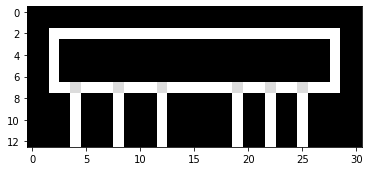

In [83]:
#action 0: #set a step for all items
#action 1: #toggle D1
#action 2: #Toggle D2
#action 3: #Toggle D3
#action 4: #toggle O1
#action 5: #toggle O2
#action 6: #toggle O3
#env.step(6) 
env.step()
#env.init_queues(queues)      #initialize new queues with a nested list
#env.update_queues(1,2)       #add a item to que 1 of size 2
#env.remove_from_queue()      #removes the oldest item in the list from queue
env.render()                 #renders the thing on screen

In [7]:
#run short trail:
env.reset()

for item in order_action_list:
    env.step(item)
    for _ in range(4):
        env.step(0)
        env.render_cv2()
    
while env.queue1 + env.queue2 + env.queue3 != []:
    env.step(0)
    env.render_cv2()

# V0.3
Adjusted to have a random state-space (based on existing policy) and have requests coming-in in a random fashion. Should be able to have the actions as:

|number|action|
|---|---|
| 0  | output order carrier size S |
| 1 | output order carrier size M |
|2 | output order carrier size L |
|3 | do nothing at output |

policy for the state of the Diverters (D1, D2, D3) is now based on demand from the GTP station:

```python
when:
demand_type at Dn == item_type at Dn:
do divert into lane
```

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

class simple_conveyor():

    def __init__(self, queues):
        """initialize states of the variables, the lists used"""
        #init queues
        self.queues = queues
        self.init_queues(self.queues)
        
        #define where the operators of the GTP stations are
        self.operator_locations = [[4,12], [8,12], [12,12]]
        self.output_locations = [[7,19], [7,22], [7,25]]
        self.diverter_locations = [[7,12], [7,8], [7,4]]
        
        #initialize divert points: 0=no diversion, 1=diversion
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = False #output of box size S 
        self.O2 = False #output of box size M
        self.O3 = False #output of box size L

        # initialize transition points: 0=no transition, 1=transition
        ## CURRENTLY NOT USED ##
        # self.T1 = 0
        # self.T2 = 0
        # self.T3 = 0

        # #initialize merge points
        # self.M1 = 0
        # self.M2 = 0
        # self.M3 = 0

        self.items_on_conv = []
        self.queue1 = []
        self.queue2 = []
        self.queue3 = []

        #intialize variables for later usage
        self.O1_location = False
        self.O2_location = False
        self.O3_location = False
        
        self.carrier_type_map = np.zeros((13,31,1))

    ## Some helper functions
    def get_candidate_lists(self, list_lists, x):
        """Returns all lists, starting with x in list of lists"""
        return [nestedlist for nestedlist in list_lists if nestedlist[0] == x]

    def len_longest_sublist(self, listoflists):
        """returns length of the longest list in the sublists"""
        return max([len(sublist) for sublist in listoflists])

    def len_shortest_sublist(self, listoflists):
        """returns length of the shortest list in the sublists"""
        return min([len(sublist) for sublist in listoflists])
        
    def init_queues(self, queues_list):
        """Initialize the queues with items from the queues list: is a nested list"""
        self.queue1 = queues_list[0]
        self.queue2 = queues_list[1]
        self.queue3 = queues_list[2]
        
    def update_queues(self, quenr, variable):
        'For a given queue 1-3, add a variable (1,2,3)'
        if quenr == 1:
            self.queue1.append(variable)
        if quenr == 2:
            self.queue2.append(variable)
        if quenr == 3:
            self.queue3.append(variable)
            
    def remove_from_queue(self, quenr):
        'For a given queue 1-3, remove the first in the queue'
        if quenr == 1:
            self.queue1 = self.queue1[1:]
        if quenr == 2:
            self.queue2 = self.queue2[1:]
        if quenr == 3:
            self.queue3 = self.queue3[1:]
    
    def simulate_operator_action(self):
        'processes an item at all the GTP stations, currently just accepts the item allways'
        self.items_on_conv = [sublist for sublist in self.items_on_conv if sublist[0] not in self.operator_locations]
        
            
    def reset(self):
        "reset all the variables to zero, empty queues"
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = False #output of box size S 
        self.O2 = False #output of box size M
        self.O3 = False #output of box size L
        
        #empty amount of items on conv.
        self.items_on_conv = []

        #reset this var
        self.O1_location = False
        self.O2_location = False
        self.O2_location = False
        
        self.carrier_type_map = np.zeros((13,31,1))
        self.init_queues(self.queues)

    def set_step(self):
        """For all items on the conveyor, do one step in designated direction"""
        #do some step
        for item in self.items_on_conv:
                #check diverters; is any of them True and is there an order carrier? move into lane.
                if item[0] == [12,7] and self.D1 == True:
                    item[0][1] +=1
                elif item[0] == [8,7] and self.D2 == True:
                    item[0][1] +=1
                elif item[0] == [4,7] and self.D3 == True:
                    item[0][1] +=1
                
                #otherwise; all items set a step in their moving direction 
                elif item[0][1] == 7 and item[0][0] > 2 and self.carrier_type_map[item[0][1]][item[0][0]-1] ==0: #if on the lower line, and not reached left corner:
                    item[0][0] -=1                     #move left
                elif item[0][0] ==2 and item[0][1] >2 and self.carrier_type_map[item[0][1]-1][item[0][0]] ==0: #if on left lane, and not reached top left corner:
                    item[0][1] -=1                     #move up
                elif item[0][1] == 2 and item[0][0] <28 and self.carrier_type_map[item[0][1]][item[0][0]+1] ==0: #if on the top lane, and not reached right top corner:
                    item[0][0] +=1                      #Move right
                elif item[0][0] == 28 and item[0][1] <7 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0: #if on right lane, and not reached right down corner:
                    item[0][1] +=1
                elif item[0][1] > 7 and item[0][1] < 12 and item[0][0] < 15 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0:
                    item[0][1] +=1
                elif item[0][1] > 7 and item[0][0] > 15 and self.carrier_type_map[item[0][1]-1][item[0][0]] ==0:
                    item[0][1] -=1

        #update occupation-states of output points
        if self.carrier_type_map[7][19] == 0:
            self.O1_location = False
        else:
            self.O1_location = True
            
        if self.carrier_type_map[7][22] == 0:
            self.O2_location = False
        else:
            self.O2_location = True
            
        if self.carrier_type_map[7][25] == 0:
            self.O3_location = False
        else:
            self.O3_location = True

    def perform_actions_in_space(self):
        """Does 3 things:
        1. Check if any diverters need to be toggled (based on demand at GTP)
        2. Set a step for all items in the system in their designated direction
        3. outputs any new order carrier at the output point when O1-On == True"""
        
        ## 1. ## check if any diverters need to be toggled
        self.carrier_type_map = np.zeros((13,31,1))
        for item in self.items_on_conv:
                self.carrier_type_map[item[0][1]][item[0][0]] = item[1]
        
        #toggle D1 if needed:
        try:
            if self.carrier_type_map[7][12] == self.queue1[0] and len(self.queue1) >= self.len_longest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][12])):
                self.D1 = True
                self.remove_from_queue(1)
            else:
                self.D1 = False
        except:
            self.D1=False
        
        #toggle D2 if needed:    
        try:
            if self.carrier_type_map[7][8] == self.queue2[0] and len(self.queue2) >= self.len_longest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][8])):
                self.D2 = True
                self.remove_from_queue(2)
            else:
                self.D2 = False
        except:
            self.D2 = False
        
        #toggle D3 if needed:
        try:
            if self.carrier_type_map[7][4] == self.queue3[0] and len(self.queue3) >= self.len_longest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][4])):
                self.D3 = True
                self.remove_from_queue(3)
            else:
                self.D3 = False
        except:
            self.D3 = False
            
        ## 2. ## set step:
        ## self.set_step()
        
        ## 3. ## output new order carrier(s)
        #if satisfied; output carrier type 1
        if self.O1 == True and self.carrier_type_map[7][19] == 0:
            self.O1_location =True            #occupy the output
            self.items_on_conv.append([[19,8], 1])
            self.O1 = False                   #turn output off
        
        #if statisfied; output carrier type 2
        elif self.O2 == True and self.carrier_type_map[7][22] == 0:
            self.O2_location =True            #occupy the output
            self.items_on_conv.append([[22,8], 2])
            self.O2 = False                   #turn output off
            
        #if satisfied, output carrier type 3
        elif self.O3 == True and self.carrier_type_map[7][25] == 0:
            self.O3_location =True            #occupy the output
            self.items_on_conv.append([[25,8], 3])
            self.O3 = False                   #turn output off

        ## 2. ## set step:
        self.set_step()
        
        
    def step_env(self, action):
        """Step function for the environment, takes an action from the action-space as input"""
        if   action==0: self.perform_actions_in_space() #set a step for all items
        elif action==1: self.D1 = not self.D1 #toggle D1
        elif action==2: self.D2 = not self.D2 #Toggle D2
        elif action==3: self.D3 = not self.D3 #Toggle D3
        elif action==4: self.O1 = not self.O1 #toggle O1
        elif action==5: self.O2 = not self.O2 #toggle O2
        elif action==6: self.O3 = not self.O3 #toggle O3
    
    def step(self, action):
        if action==0:
            self.step_env(0)
        elif action ==1:
            self.step_env(4)
            self.step_env(0)
        elif action ==2:
            self.step_env(5)
            self.step_env(0)
        elif action ==3: 
            self.step_env(6)
            self.step_env(0)

            
        # return next_state, reward, terminate, info

        #todo:
        # - Fix returns
        # - build reward function
        # - termination criteria
        # - additional info

    def render_plt(self):
        """Simple render function, uses matplotlib to render the image + some additional information on the transition points"""
        print('items on conveyor:')
        print(self.items_on_conv)
        print('states of Divert points:')
        print('D1 = {}, D2 = {}, D3 = {}'.format(self.D1, self.D2, self.D3))
        print('States of output points:')
        print('O1 = {}, O2 = {}, O3 = {}'.format(self.O1, self.O2, self.O3))
        print('States of output location:')
        print('O1 = {}, O2 = {}, O3 = {}'.format(self.O1_location, self.O2_location, self.O3_location))
        print('Queue GTP 1: {}'.format(self.queue1))
        print('Queue GTP 2: {}'.format(self.queue2))
        print('Queue GTP 3: {}'.format(self.queue3))
        try:
            print(self.len_shortest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][12])))
        except:
            print('no item to merge argmin error')
        df = pd.read_csv('representation3.csv', delimiter=';', ).fillna(0)
        listoflists = df.values.tolist()
        image = np.asarray([[(255,255,255) if x =='x' else (220,220,220) if x =='y' else (0,0,0) for x in item] for item in listoflists])

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 
        plt.imshow(np.asarray(image))
        plt.show()
    
    def render(self):
        """render with opencv, for faster processing"""
        df = pd.read_csv('representation3.csv', delimiter=';', ).fillna(0)
        listoflists = df.values.tolist()
        image = np.asarray([[(255,255,255) if x =='x' else (220,220,220) if x =='y' else (0,0,0) for x in item] for item in listoflists])

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 
        
        #resize with PIL
        im = Image.fromarray(np.uint8(image))
        img = im.resize((600,240))
        cv2.imshow("Simulation-v0.1", np.array(img))
        cv2.waitKey(0)


In [303]:
queues = [[1,2,3,2,3,1], [2,3,1,3,1,2], [1,3,2,1,2,2]] #sample queues for format WHERE 1=S, 2=M, 3=L
env = simple_conveyor(queues)
env.reset()

In [304]:
#Build action list according to FIFO and Round-Robin Policy
order_list = []
for index in range(len(env.queues[0])):
    order_list.append([item[index] for item in env.queues])

#flat_list = [item for sublist in l for item in sublist]
order_list = [item for sublist in order_list for item in sublist]
print("Sequence of order is:",  order_list)
order_action_list = [1 if x == 1 else 2 if x ==2 else 3 for x in order_list]
print("Resulting in sequence of actions: ", order_action_list)

Sequence of order is: [1, 2, 1, 2, 3, 3, 3, 1, 2, 2, 3, 1, 3, 1, 2, 1, 2, 2]
Resulting in sequence of actions:  [1, 2, 1, 2, 3, 3, 3, 1, 2, 2, 3, 1, 3, 1, 2, 1, 2, 2]


items on conveyor:
[[[22, 7], 2]]
states of Divert points:
D1 = False, D2 = False, D3 = False
States of output points:
O1 = False, O2 = False, O3 = False
States of output location:
O1 = False, O2 = False, O3 = False
Queue GTP 1: [1, 2, 3, 2, 3, 1]
Queue GTP 2: [2, 3, 1, 3, 1, 2]
Queue GTP 3: [1, 3, 2, 1, 2, 2]
no item to merge argmin error


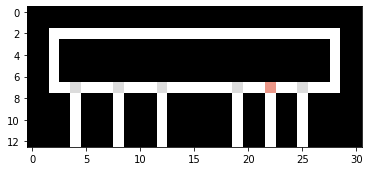

In [305]:
#env.reset()
#env.step(6) 
env.step(2)
#env.init_queues(queues)      #initialize new queues with a nested list
#env.update_queues(1,2)       #add a item to que 1 of size 2
#env.remove_from_queue()      #removes the oldest item in the list from queue
env.render_plt()                 #renders the thing on screen

# V.03
optimized of the new step action

In [531]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

class simple_conveyor():

######## INITIALIZATION OF VARIABLES ###############################################################################################################
    def __init__(self, queues):
        """initialize states of the variables, the lists used"""
        #init queues
        self.queues = queues
        self.init_queues(self.queues)
        
        #define where the operators of the GTP stations are
        self.operator_locations = [[4,12], [8,12], [12,12]]
        self.output_locations = [[7,19], [7,22], [7,25]]
        self.diverter_locations = [[7,12], [7,8], [7,4]]
        
        #initialize divert points: 0=no diversion, 1=diversion
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = 0 #output of box size S 
        self.O2 = 0 #output of box size M
        self.O3 = 0 #output of box size L

        # initialize transition points: 0=no transition, 1=transition
        ## CURRENTLY NOT USED ##
        # self.T1 = 0
        # self.T2 = 0
        # self.T3 = 0

        # #initialize merge points
        # self.M1 = 0
        # self.M2 = 0
        # self.M3 = 0

        self.items_on_conv = []

        #intialize variables for later usage
        self.O1_location = False
        self.O2_location = False
        self.O3_location = False
        
        self.carrier_type_map = np.zeros((13,31,1))

###### HELPER FUNCTIONS ############################################################################################################################
    def get_candidate_lists(self, list_lists, x):
        """Returns all lists, starting with x in list of lists"""
        return [nestedlist for nestedlist in list_lists if nestedlist[0] == x]

    def len_longest_sublist(self, listoflists):
        """returns length of the longest list in the sublists"""
        return max([len(sublist) for sublist in listoflists])

    def len_shortest_sublist(self, listoflists):
        """returns length of the shortest list in the sublists"""
        return min([len(sublist) for sublist in listoflists])
        
    def init_queues(self, queues_list):
        """Initialize the queues with items from the queues list: is a nested list"""
        self.queue1 = queues_list[0]
        self.queue2 = queues_list[1]
        self.queue3 = queues_list[2]
        
    def update_queues(self, quenr, variable):
        'For a given queue 1-3, add a variable (1,2,3)'
        if quenr == 1:
            self.queue1.append(variable)
        if quenr == 2:
            self.queue2.append(variable)
        if quenr == 3:
            self.queue3.append(variable)
            
    def remove_from_queue(self, quenr):
        'For a given queue 1-3, remove the first in the queue'
        if quenr == 1:
            self.queue1 = self.queue1[1:]
        if quenr == 2:
            self.queue2 = self.queue2[1:]
        if quenr == 3:
            self.queue3 = self.queue3[1:]
    
    def simulate_operator_action(self):
        'processes an item at all the GTP stations, currently just accepts the item allways'
        self.items_on_conv = [sublist for sublist in self.items_on_conv if sublist[0] not in self.operator_locations]
 ########################################################################################################################################################       
 ## RESET FUNCTION 
 #            
    def reset(self):
        "reset all the variables to zero, empty queues"
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = 0 #output of box size S 
        self.O2 = 0 #output of box size M
        self.O3 = 0 #output of box size L
        
        #empty amount of items on conv.
        self.items_on_conv = []
        
        self.carrier_type_map = np.zeros((13,31,1))
        self.init_queues(self.queues)

########################################################################################################################################################
## STEP FUNCTION
#
    def step_env(self):

####make carrier type map
        self.carrier_type_map = np.zeros((13,31,1))
        for item in self.items_on_conv:
            self.carrier_type_map[item[0][1]][item[0][0]] = item[1]

####toggle diverters if needed
        #toggle D1 if needed:
        try:
            if self.carrier_type_map[7][12] == self.queue1[0] and len(self.queue1) >= self.len_longest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][12])):
                self.D1 = True
                self.remove_from_queue(1)
            else:
                self.D1 = False
        except:
            self.D1=False
        
        #toggle D2 if needed:    
        try:
            if self.carrier_type_map[7][8] == self.queue2[0] and len(self.queue2) >= self.len_longest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][8])):
                self.D2 = True
                self.remove_from_queue(2)
            else:
                self.D2 = False
        except:
            self.D2 = False
        
        #toggle D3 if needed:
        try:
            if self.carrier_type_map[7][4] == self.queue3[0]:  #and len(self.queue3) >= self.len_longest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][4])):
                self.D3 = True
                self.remove_from_queue(3)
            else:
                self.D3 = False
        except:
            self.D3 = False

####Divert when at diverter, and diverter is set to true
####Do step for all items on conv
        for item in self.items_on_conv:
            #check diverters; is any of them True and is there an order carrier? move into lane.
            if item[0] == [12,7] and self.D1 == True:
                item[0][1] +=1
            elif item[0] == [8,7] and self.D2 == True:
                item[0][1] +=1
            elif item[0] == [4,7] and self.D3 == True:
                item[0][1] +=1
            
            #otherwise; all items set a step in their moving direction 
            elif item[0][1] == 7 and item[0][0] > 2 and self.carrier_type_map[item[0][1]][item[0][0]-1] ==0: #if on the lower line, and not reached left corner:
                item[0][0] -=1                     #move left
            elif item[0][0] ==2 and item[0][1] >2 and self.carrier_type_map[item[0][1]-1][item[0][0]] ==0: #if on left lane, and not reached top left corner:
                item[0][1] -=1                     #move up
            elif item[0][1] == 2 and item[0][0] <28 and self.carrier_type_map[item[0][1]][item[0][0]+1] ==0: #if on the top lane, and not reached right top corner:
                item[0][0] +=1                      #Move right
            elif item[0][0] == 28 and item[0][1] <7 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0: #if on right lane, and not reached right down corner:
                item[0][1] +=1
            elif item[0][1] > 7 and item[0][1] < 12 and item[0][0] < 15 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0:
                item[0][1] +=1
            elif item[0][1] > 7 and item[0][0] > 15 and self.carrier_type_map[item[0][1]-1][item[0][0]] ==0:
                item[0][1] -=1

        ####try to add new item from output when On!=0
        if self.O1 !=0 and self.carrier_type_map[7][19] == 0:
            self.items_on_conv.append([[19,7], 1])
            self.O1 -=1
        
        elif self.O2 !=0 and self.carrier_type_map[7][22] == 0:
            self.items_on_conv.append([[22,7], 1])
            self.O2 -=1

        elif self.O3 !=0 and self.carrier_type_map[7][25] == 0:
            self.items_on_conv.append([[25,7], 1])
            self.O3 -=1

    def step(self, action):
        if action==0:
            self.step_env()
        elif action ==1: 
            self.O1 +=1
            self.step_env()
        elif action ==2:
            self.O2 +=1
            self.step_env()
        elif action ==3:
            self.O3 +=1
            self.step_env()

   

################## RENDER FUNCTIONS ################################################################################################
    def render_plt(self):
        """Simple render function, uses matplotlib to render the image + some additional information on the transition points"""
        print('items on conveyor:')
        print(self.items_on_conv)
        print('states of Divert points:')
        print('D1 = {}, D2 = {}, D3 = {}'.format(self.D1, self.D2, self.D3))
        print('States of output points:')
        print('O1 = {}, O2 = {}, O3 = {}'.format(self.O1, self.O2, self.O3))
        print('States of output location:')
        print('O1 = {}, O2 = {}, O3 = {}'.format(self.O1_location, self.O2_location, self.O3_location))
        print('Queue GTP 1: {}'.format(self.queue1))
        print('Queue GTP 2: {}'.format(self.queue2))
        print('Queue GTP 3: {}'.format(self.queue3))
        try:
            print(self.len_shortest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][12])))
        except:
            print('no item to merge argmin error')
        df = pd.read_csv('representation3.csv', delimiter=';', ).fillna(0)
        listoflists = df.values.tolist()
        image = np.asarray([[(255,255,255) if x =='x' else (220,220,220) if x =='y' else (0,0,0) for x in item] for item in listoflists])

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 
        plt.imshow(np.asarray(image))
        plt.show()
        return image
    
    def render(self):
        """render with opencv, for faster processing"""
        df = pd.read_csv('representation3.csv', delimiter=';', ).fillna(0)
        listoflists = df.values.tolist()
        image = np.asarray([[(255,255,255) if x =='x' else (220,220,220) if x =='y' else (0,0,0) for x in item] for item in listoflists])

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 
        
        #resize with PIL
        im = Image.fromarray(np.uint8(image))
        img = im.resize((600,240), resample=Image.BOX) #BOX for no anti-aliasing)
        cv2.imshow("Simulation-v0.1", np.array(img))
        cv2.waitKey(0)


In [532]:
## Test the item
queues = [[1,2,3,2,3,1], [2,3,1,3,1,2], [1,3,2,1,2,1]] #sample queues for format WHERE 1=S, 2=M, 3=L
env = simple_conveyor(queues)
env.reset()

#Build action list according to FIFO and Round-Robin Policy
order_list = []
for index in range(len(env.queues[0])):
    order_list.append([item[index] for item in env.queues])

#flat_list = [item for sublist in l for item in sublist]
order_list = [item for sublist in order_list for item in sublist]
print("Resulting in sequence of actions: ", order_list)

#run short trail:
env.reset()

Resulting in sequence of actions:  [1, 2, 1, 2, 3, 3, 3, 1, 2, 2, 3, 1, 3, 1, 2, 1, 2, 1]


items on conveyor:
[[[12, 7], 1], [[14, 7], 1], [[16, 7], 1], [[18, 7], 1], [[20, 7], 1], [[22, 7], 1]]
states of Divert points:
D1 = False, D2 = False, D3 = False
States of output points:
O1 = 0, O2 = 5, O3 = 0
States of output location:
O1 = False, O2 = False, O3 = False
Queue GTP 1: [1, 2, 3, 2, 3, 1]
Queue GTP 2: [2, 3, 1, 3, 1, 2]
Queue GTP 3: [1, 3, 2, 1, 2, 1]
no item to merge argmin error


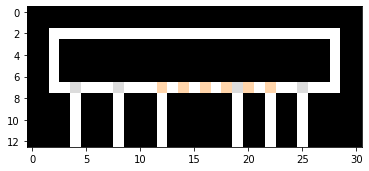

In [545]:
#env.reset()
#env.step(6) 
env.step(2)
#env.init_queues(queues)      #initialize new queues with a nested list
#env.update_queues(1,2)       #add a item to que 1 of size 2
#env.remove_from_queue()      #removes the oldest item in the list from queue
iets = env.render_plt()                 #renders the thing on screen

In [548]:
iets[7]

array([[  0,   0,   0],
       [  0,   0,   0],
       [255, 255, 255],
       [255, 255, 255],
       [220, 220, 220],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [220, 220, 220],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 213, 171],
       [255, 255, 255],
       [255, 213, 171],
       [255, 255, 255],
       [255, 213, 171],
       [255, 255, 255],
       [255, 213, 171],
       [220, 220, 220],
       [255, 213, 171],
       [255, 255, 255],
       [255, 213, 171],
       [255, 255, 255],
       [255, 255, 255],
       [220, 220, 220],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [  0,   0,   0],
       [  0,   0,   0]])

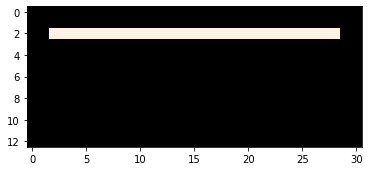

In [528]:
empty = np.zeros((13, 31, 3))
for i in range(2,29):
    empty[2][i]=ColorConverter.to_rgb('#fff2e5')

plt.imshow(empty)
plt.show()

In [396]:

ColorConverter.to_rgb('#fff2e5')

(1.0, 0.9490196078431372, 0.8980392156862745)

In [382]:
n=4
a = np.random.random((n,n,3))
a

array([[[0.09336133, 0.77276212, 0.78701331],
        [0.0732371 , 0.83275724, 0.78854878],
        [0.57200524, 0.47409213, 0.55540461],
        [0.93093142, 0.97142748, 0.92831928]],

       [[0.96165115, 0.92851958, 0.89619634],
        [0.27761218, 0.73176543, 0.74027747],
        [0.13871124, 0.68842066, 0.33340027],
        [0.44121605, 0.48477412, 0.72338449]],

       [[0.66530279, 0.12659082, 0.83494016],
        [0.43945041, 0.36392716, 0.79143307],
        [0.25458848, 0.20693269, 0.70974459],
        [0.16924232, 0.14324789, 0.02767303]],

       [[0.71620035, 0.9132425 , 0.76463804],
        [0.62165498, 0.31209915, 0.07422   ],
        [0.98323731, 0.11639963, 0.89193827],
        [0.17218062, 0.24712219, 0.63762835]]])

<function matplotlib.pyplot.show(*args, **kw)>

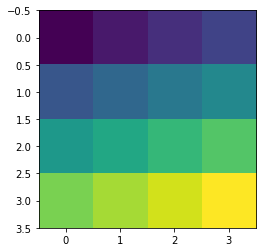

In [380]:
plt.imshow(a)
from matplotlib.colors import ColorConverterplt.show

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


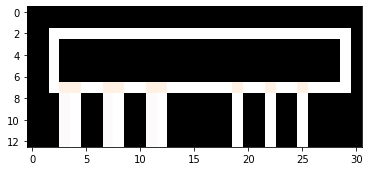

In [420]:
from matplotlib.colors import ColorConverter


plt.imshow(empty)
plt.show()

In [424]:
for i in range(0,3):
    print(i)

0
1
2


In [431]:
#self.empty_env.shape[1] = 31
shape = 31
outputs = 3

[[shape-i*3-6,7]for i in range(outputs)]

[[25, 7], [22, 7], [19, 7]]

# V5
more uniform to changes in shape

In [474]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from matplotlib.colors import ColorConverter

class simple_conveyor():

######## INITIALIZATION OF VARIABLES ###############################################################################################################
    def __init__(self, queues):
        """initialize states of the variables, the lists used"""
        #init queues
        self.queues = queues
        self.init_queues = self.queues
        self.amount_of_gtps = 3
        self.amount_of_outputs = 3
        self.empty_env = self.generate_env(self.amount_of_gtps)

        
        #define where the operators of the GTP stations are
        self.operator_locations = [[i, 12] for i in range(4,self.amount_of_gtps*4+1,4)][::-1]
        self.output_locations = [[self.empty_env.shape[1]-i*3-6,7]for i in range(self.amount_of_outputs)][::-1]
        self.diverter_locations = [[i, 7] for i in range(4,self.amount_of_gtps*4+1,4)][::-1]
        
        #initialize divert points: 0=no diversion, 1=diversion
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = 0 #output of box size S 
        self.O2 = 0 #output of box size M
        self.O3 = 0 #output of box size L

        # initialize transition points: 0=no transition, 1=transition
        ## CURRENTLY NOT USED ##
        # self.T1 = 0
        # self.T2 = 0
        # self.T3 = 0

        # #initialize merge points
        # self.M1 = 0
        # self.M2 = 0
        # self.M3 = 0

        self.items_on_conv = []

        #intialize variables for later usage
        self.O1_location = False
        self.O2_location = False
        self.O3_location = False
        
        self.carrier_type_map = np.zeros((13,31,1))

    def generate_env(self, no_of_gtp):
        """returns empty env, with some variables about the size, lanes etc."""
        empty = np.zeros((15, 19+4*no_of_gtp, 3))
        for i in range(2,empty.shape[1]-2):
            empty[2][i]=(255,255,255)
            empty[7][i]=(255,255,255)
        for i in range(2,8):
            empty[i][2]=(255,255,255)
            empty[i][empty.shape[1]-2]=(255,255,255)
        for i in range(8,empty.shape[0]): 
            for j in range(4,no_of_gtp*4+1,4):
                empty[i][j] = (255,255,255)
                empty[i][j-1] = (250, 250,250)
            for j in range(empty.shape[1]-12,empty.shape[1]-5,3):
                empty[i][j] = (255,255,255)
        for i in range(4,no_of_gtp*4+1, 4):
            empty[7][i-1] = (255, 242, 229)
            empty[7][i] = (255, 242, 229)

        for i in range(empty.shape[1]-12,empty.shape[1]-5,3):
            empty[7][i] = (255, 242, 229)

        return empty

###### HELPER FUNCTIONS ############################################################################################################################
    def get_candidate_lists(self, list_lists, x):
        """Returns all lists, starting with x in list of lists"""
        return [nestedlist for nestedlist in list_lists if nestedlist[0] == x]

    def len_longest_sublist(self, listoflists):
        """returns length of the longest list in the sublists"""
        return max([len(sublist) for sublist in listoflists])

    def len_shortest_sublist(self, listoflists):
        """returns length of the shortest list in the sublists"""
        return min([len(sublist) for sublist in listoflists])
        
    def update_queues(self, quenr, variable):
        'For a given queue 1-3, add a variable (1,2,3)'
        for i in range(self.amount_of_gtps):
            if quenr == i+1:
                self.init_queues[i].append(variable)
            
    def remove_from_queue(self, quenr):
        'For a given queue 1-3, remove the first in the queue'
        for i in range(self.amount_of_gtps):
            if quenr == i+1:
                self.init_queues[0]= self.init_queues[1:]
    
    def simulate_operator_action(self):
        'processes an item at all the GTP stations, currently just accepts the item allways'
        self.items_on_conv = [sublist for sublist in self.items_on_conv if sublist[0] not in self.operator_locations]
 ########################################################################################################################################################       
 ## RESET FUNCTION 
 #            
    def reset(self):
        "reset all the variables to zero, empty queues"
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = 0 #output of box size S 
        self.O2 = 0 #output of box size M
        self.O3 = 0 #output of box size L
        
        #empty amount of items on conv.
        self.items_on_conv = []
        
        
        self.init_queues = self.queues
        self.empty_env = self.generate_env(self.amount_of_gtps)
        self.carrier_type_map = np.zeros(self.empty_env.shape)

########################################################################################################################################################
## STEP FUNCTION
#
    def step_env(self):

####make carrier type map
        self.carrier_type_map = np.zeros(self.empty_env.shape)
        for item in self.items_on_conv:
            self.carrier_type_map[item[0][1]][item[0][0]] = item[1]

####toggle diverters if needed
        #toggle D1 if needed:
        try:
            if self.carrier_type_map[7][12] == self.queue1[0] and len(self.queue1) >= self.len_longest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][12])):
                self.D1 = True
                self.remove_from_queue(1)
            else:
                self.D1 = False
        except:
            self.D1=False
        
        #toggle D2 if needed:    
        try:
            if self.carrier_type_map[7][8] == self.queue2[0] and len(self.queue2) >= self.len_longest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][8])):
                self.D2 = True
                self.remove_from_queue(2)
            else:
                self.D2 = False
        except:
            self.D2 = False
        
        #toggle D3 if needed:
        try:
            if self.carrier_type_map[7][4] == self.queue3[0]:  #and len(self.queue3) >= self.len_longest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][4])):
                self.D3 = True
                self.remove_from_queue(3)
            else:
                self.D3 = False
        except:
            self.D3 = False

####Divert when at diverter, and diverter is set to true
####Do step for all items on conv
        for item in self.items_on_conv:
            #check diverters; is any of them True and is there an order carrier? move into lane.
            if item[0] == [12,7] and self.D1 == True:
                item[0][1] +=1
            elif item[0] == [8,7] and self.D2 == True:
                item[0][1] +=1
            elif item[0] == [4,7] and self.D3 == True:
                item[0][1] +=1
            
            #otherwise; all items set a step in their moving direction 
            elif item[0][1] == 7 and item[0][0] > 2 and self.carrier_type_map[item[0][1]][item[0][0]-1] ==0: #if on the lower line, and not reached left corner:
                item[0][0] -=1                     #move left
            elif item[0][0] ==2 and item[0][1] >2 and self.carrier_type_map[item[0][1]-1][item[0][0]] ==0: #if on left lane, and not reached top left corner:
                item[0][1] -=1                     #move up
            elif item[0][1] == 2 and item[0][0] <28 and self.carrier_type_map[item[0][1]][item[0][0]+1] ==0: #if on the top lane, and not reached right top corner:
                item[0][0] +=1                      #Move right
            elif item[0][0] == 28 and item[0][1] <7 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0: #if on right lane, and not reached right down corner:
                item[0][1] +=1
            elif item[0][1] > 7 and item[0][1] < 12 and item[0][0] < 15 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0:
                item[0][1] +=1
            elif item[0][1] > 7 and item[0][0] > 15 and self.carrier_type_map[item[0][1]-1][item[0][0]] ==0:
                item[0][1] -=1

        ####try to add new item from output when On!=0
        if self.O1 !=0 and self.carrier_type_map[7][20] == 0:
            self.items_on_conv.append([[19,7], 1])
            self.O1 -=1
        
        elif self.O2 !=0 and self.carrier_type_map[7][23] == 0:
            self.items_on_conv.append([[22,7], 2])
            self.O2 -=1

        elif self.O3 !=0 and self.carrier_type_map[7][26] == 0:
            self.items_on_conv.append([[25,7], 3])
            self.O3 -=1

    def step(self, action):
        if action==0:
            self.step_env()
        elif action ==1: 
            self.O1 +=1
            self.step_env()
        elif action ==2:
            self.O2 +=1
            self.step_env()
        elif action ==3:
            self.O3 +=1
            self.step_env()

   

################## RENDER FUNCTIONS ################################################################################################
    def render_plt(self):
        """Simple render function, uses matplotlib to render the image + some additional information on the transition points"""
        print('items on conveyor:')
        print(self.items_on_conv)
        print('states of Divert points:')
        print('D1 = {}, D2 = {}, D3 = {}'.format(self.D1, self.D2, self.D3))
        print('States of output points:')
        print('O1 = {}, O2 = {}, O3 = {}'.format(self.O1, self.O2, self.O3))
        print('States of output location:')
        print('O1 = {}, O2 = {}, O3 = {}'.format(self.O1_location, self.O2_location, self.O3_location))
        print('Queue GTP 1: {}'.format(self.queue1))
        print('Queue GTP 2: {}'.format(self.queue2))
        print('Queue GTP 3: {}'.format(self.queue3))
        try:
            print(self.len_shortest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][12])))
        except:
            print('no item to merge argmin error')
        df = pd.read_csv('representation3.csv', delimiter=';', ).fillna(0)
        listoflists = df.values.tolist()
        image = np.asarray([[(255,255,255) if x =='x' else (220,220,220) if x =='y' else (0,0,0) for x in item] for item in listoflists])

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 
        plt.imshow(np.asarray(image))
        plt.show()
    
    def render1(self):
        """render with opencv, for faster processing"""
        df = pd.read_csv('representation3.csv', delimiter=';', ).fillna(0)
        listoflists = df.values.tolist()
        image = np.asarray([[(255,255,255) if x =='x' else (220,220,220) if x =='y' else (0,0,0) for x in item] for item in listoflists])

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 
    

        #resize with PIL
        im = Image.fromarray(np.uint8(image))
        img = im.resize((600,240), resample=Image.BOX) #BOX for no anti-aliasing)
        cv2.imshow("Simulation-v0.1", np.array(img))
        cv2.waitKey(0)

    def render(self):
        """render with opencv, for faster processing"""
        image = self.generate_env(self.amount_of_gtps)

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 

        #resize with PIL
        im = Image.fromarray(np.uint8(image))
        img = im.resize((600,240), resample=Image.BOX) #BOX for no anti-aliasing)
        cv2.imshow("Simulation-v0.1", np.array(img))
        cv2.waitKey(0)

############### MAIN ##############################################################################################################################################

In [475]:
## Test the item
queues = [[1,2,3,2,3], [2,3,1,3,1], [1,3,2,1,2]] #sample queues for format WHERE 1=S, 2=M, 3=L
env = simple_conveyor(queues)
env.reset()

# 5.1

In [582]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from matplotlib.colors import ColorConverter

class simple_conveyor():

######## INITIALIZATION OF VARIABLES ###############################################################################################################
    def __init__(self, queues):
        """initialize states of the variables, the lists used"""
        #init queues
        self.queues = queues
        self.init_queues = self.queues

        #init config
        self.amount_of_gtps = 3
        self.amount_of_outputs = 3
        self.empty_env = self.generate_env(self.amount_of_gtps)

        
        #define where the operators of the GTP stations are
        self.operator_locations = [[i, 12] for i in range(4,self.amount_of_gtps*4+1,4)][::-1]
        self.output_locations = [[self.empty_env.shape[1]-i*3-6,7]for i in range(self.amount_of_outputs)][::-1]
        self.diverter_locations = [[i, 7] for i in range(4,self.amount_of_gtps*4+1,4)][::-1]
        print("operator locations: ", self.operator_locations)
        print("output locations: ", self.output_locations)
        print("diverter locations: ", self.diverter_locations)
        #initialize divert points: 0=no diversion, 1=diversion
        self.D_states = {}
        for i in range(1,len(self.diverter_locations)+1):
            self.D_states[i] = False
        
        #initialize output points
        self.O_states = {}
        for i in range(1,len(self.output_locations)+1):
            self.D_states[i] = 0

        # initialize transition points: 0=no transition, 1=transition
        ## CURRENTLY NOT USED ##
        # T_states = {}
        # for i in range(1,len(self.diverter_locations)+1):
        #     T_states[i] = False

        # #initialize merge points
        # M_states = {}
        # for i in range(1,len(self.diverter_locations)+1):
        #     M_states[i] = False

        self.items_on_conv = []        
        self.carrier_type_map = np.zeros((self.empty_env.shape[0],self.empty_env.shape[1],1))

    def generate_env(self, no_of_gtp):
        """returns empty env, with some variables about the size, lanes etc."""
        empty = np.zeros((15, 19+4*no_of_gtp, 3))
        for i in range(2,empty.shape[1]-2):
            empty[2][i]=(255,255,255)
            empty[7][i]=(255,255,255)
        for i in range(2,8):
            empty[i][2]=(255,255,255)
            empty[i][empty.shape[1]-2]=(255,255,255)
        for i in range(8,empty.shape[0]): 
            for j in range(4,no_of_gtp*4+1,4):
                empty[i][j] = (255,255,255)
                empty[i][j-1] = (250, 250,250)
            for j in range(empty.shape[1]-12,empty.shape[1]-5,3):
                empty[i][j] = (255,255,255)
        for i in range(4,no_of_gtp*4+1, 4):
            empty[7][i-1] = (255, 242, 229)
            empty[7][i] = (255, 242, 229)

        for i in range(empty.shape[1]-12,empty.shape[1]-5,3):
            empty[7][i] = (255, 242, 229)

        return empty

###### HELPER FUNCTIONS ############################################################################################################################
    def get_candidate_lists(self, list_lists, x):
        """Returns all lists, starting with x in list of lists"""
        return [nestedlist for nestedlist in list_lists if nestedlist[0] == x]

    def len_longest_sublist(self, listoflists):
        """returns length of the longest list in the sublists"""
        return max([len(sublist) for sublist in listoflists])

    def len_shortest_sublist(self, listoflists):
        """returns length of the shortest list in the sublists"""
        return min([len(sublist) for sublist in listoflists])
        
    def update_queues(self, quenr, variable):
        'For a given queue 1-3, add a variable (1,2,3)'
        for i in range(self.amount_of_gtps):
            if quenr == i+1:
                self.init_queues[i].append(variable)
            
    def remove_from_queue(self, quenr):
        'For a given queue 1-3, remove the first in the queue'
        for i in range(self.amount_of_gtps):
            if quenr == i+1:
                self.init_queues[0]= self.init_queues[1:]

    
    def simulate_operator_action(self):
        'processes an item at all the GTP stations, currently just accepts the item allways'
        self.items_on_conv = [sublist for sublist in self.items_on_conv if sublist[0] not in self.operator_locations]
 ########################################################################################################################################################       
 ## RESET FUNCTION 
 #            
    def reset(self):
        "reset all the variables to zero, empty queues"
        self.D_states = {}
        for i in range(1,len(self.diverter_locations)+1):
            self.D_states[i] = False
        
        #initialize output points
        self.O_states = {}
        for i in range(1,len(self.output_locations)+1):
            self.O_states[i] = 0
        
        #empty amount of items on conv.
        self.items_on_conv = []
        
        
        self.init_queues = self.queues
        self.empty_env = self.generate_env(self.amount_of_gtps)
        self.carrier_type_map = np.zeros((self.empty_env.shape[0],self.empty_env.shape[1],1))

########################################################################################################################################################
## STEP FUNCTION
#
    def step_env(self):

####make carrier type map
        self.carrier_type_map = np.zeros((env.empty_env.shape[0],env.empty_env.shape[1],1))
        for item in self.items_on_conv:
            self.carrier_type_map[item[0][1]][item[0][0]] = item[1]

####toggle diverters if needed
        #toggle All D_states if needed:
        for cord in self.diverter_locations:
            try:
                if self.carrier_type_map[cord[0][1]][cord[0][0]] == self.init_queues[self.diverter_locations.index(cord)][0] and len(self.init_queues[self.diverter_locations.index(cord)]) >= self.len_longest_sublist(self.get_candidate_lists(self.init_queues, self.carrier_type_map[cord[0][1]][cord[0][0]])):
                    self.D_states[self.diverter_locations.index(cord)+1] = True
                    print("set diverter state for diverter {} to TRUE".format(self.diverter_locations.index(cord)+1))
                    self.remove_from_queue(self.diverter_locations.index(cord)+1)
                    print("request removed from queue")

                else:
                    self.D_states[self.diverter_locations.index(cord)+1] = False
                    print("catched in else statement")
            except:
                self.D_states[self.diverter_locations.index(cord)+1] = False
                print("except")

        

####Divert when at diverter, and diverter is set to true
####Do step for all items on conv
        for item in self.items_on_conv:
            #check diverters; is any of them True and is there an order carrier? move into lane.
            for cord in self.diverter_locations:
                if item[0] == cord and self.D_states[self.diverter_locations.index(cord)+1] == True:
                    item[0][1] +=1
                    print("moved order carrier into GTP lane {}".format(self.diverter_locations.index(cord)+1))
            
            #otherwise; all items set a step in their moving direction 
            if item[0][1] == 7 and item[0][0] > 2 and self.carrier_type_map[item[0][1]][item[0][0]-1] ==0: #if on the lower line, and not reached left corner:
                item[0][0] -=1                     #move left
            elif item[0][0] ==2 and item[0][1] >2 and self.carrier_type_map[item[0][1]-1][item[0][0]] ==0: #if on left lane, and not reached top left corner:
                item[0][1] -=1                     #move up
            elif item[0][1] == 2 and item[0][0] < self.empty_env.shape[1]-3 and self.carrier_type_map[item[0][1]][item[0][0]+1] ==0: #if on the top lane, and not reached right top corner:
                item[0][0] +=1                      #Move right
            elif item[0][0] == self.empty_env.shape[1]-3 and item[0][1] <7 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0: #if on right lane, and not reached right down corner:
                item[0][1] +=1
            elif item[0][1] > 7 and item[0][1] < self.empty_env.shape[0]-1 and item[0][0] < self.amount_of_gtps*4+3 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0: #move down into lane
                item[0][1] +=1
            elif item[0][1] > 7 and item[0][0] > self.amount_of_gtps*4+3 and self.carrier_type_map[item[0][1]-1][item[0][0]] ==0:
                item[0][1] -=1

        ####try to add new item from output when On!=0
        for cord in self.output_locations:
            if self.O_states[self.output_locations.index(cord)+1] !=0 and self.carrier_type_map[cord[1]][cord[0]+1] ==0:
                self.items_on_conv.append([cord,self.output_locations.index(cord)+1])

    def step(self, action):
        if action==0:
            self.step_env()
            print("action 0 executed")
        elif action ==1: 
            self.O_states[1] +=1
            self.step_env()
            print("action 1 executed")
            print(self.O_states)
        elif action ==2:
            self.O_states[2] +=1
            self.step_env()
            print("action 2 executed")
            print(self.O_states)
        elif action ==3:
            self.O_states[3] +=1
            self.step_env()
            print("action 3 executed")
            print(self.O_states)

   

################## RENDER FUNCTIONS ################################################################################################
    def render_plt(self):
        """Simple render function, uses matplotlib to render the image + some additional information on the transition points"""
        print('items on conveyor:')
        print(self.items_on_conv)
        print('states of Divert points = {}'.format(self.D_states))
        print('states of Output points = {}'.format(self.O_states))
        for queue in self.init_queues:
            print('Queue GTP{}: {}'.format(self.init_queues.index(queue)+1, queue))

        image = self.generate_env(self.amount_of_gtps).astype(int)

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 
        plt.imshow(np.asarray(image))
        plt.show()
    

    def render(self):
        """render with opencv, for faster processing"""
        image = self.generate_env(self.amount_of_gtps)

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 

        #resize with PIL
        im = Image.fromarray(np.uint8(image))
        img = im.resize((600,240), resample=Image.BOX) #BOX for no anti-aliasing)
        cv2.imshow("Simulation-v0.1", np.array(img))
        cv2.waitKey(0)


In [583]:
############### MAIN ##############################################################################################################################################

## Test the item
queues = [[1,2,3,2,3], [2,3,1,3,1], [1,3,2,1,2]] #sample queues for format WHERE 1=S, 2=M, 3=L
env = simple_conveyor(queues)
env.reset()

operator locations:  [[12, 12], [8, 12], [4, 12]]
output locations:  [[19, 7], [22, 7], [25, 7]]
diverter locations:  [[12, 7], [8, 7], [4, 7]]


In [584]:
#Build action list according to FIFO and Round-Robin Policy
order_list = []
for index in range(len(env.queues[0])):
    order_list.append([item[index] for item in env.queues])

#flat_list = [item for sublist in l for item in sublist]
order_list = [item for sublist in order_list for item in sublist]
print("Resulting in sequence of actions: ", order_list)

Resulting in sequence of actions:  [1, 2, 1, 2, 3, 3, 3, 1, 2, 2, 3, 1, 3, 1, 2]


except
except
except
action 0 executed
items on conveyor:
[[[12, 7], 1]]
states of Divert points = {1: False, 2: False, 3: False}
states of Output points = {1: 2, 2: 0, 3: 0}
Queue GTP1: [1, 2, 3, 2, 3]
Queue GTP2: [2, 3, 1, 3, 1]
Queue GTP3: [1, 3, 2, 1, 2]


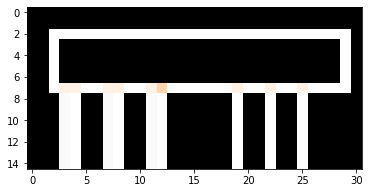

In [593]:
env.step(0)
env.render_plt()

In [499]:
env.output_locations

[[25, 7], [22, 7], [19, 7]]

In [568]:
cord

[4, 7]

In [569]:
env.diverter_locations.index(cord)

4

In [507]:
np.zeros(env.empty_env.shape[0],env.empty_env.shape[1],1)

TypeError: data type not understood

In [554]:
image = env.generate_env(env.amount_of_gtps)

In [574]:
for cord in env.diverter_locations:
    cord

In [575]:
cord

[4, 7]

In [594]:
env.carrier_type_map[cord[1]][cord[0]] == env.init_queues[env.diverter_locations.index(cord)][0]

array([False])

In [578]:
env.init_queues[env.diverter_locations.index(cord)][

1